Sprawozdanie 6, Bazyli Polednia

In [31]:
import math
from scipy.integrate import romberg, quad
from scipy.optimize import newton
from scipy.stats import norm
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

Zadanie 1:

Najbardziej zbliżona do wyniku analitycznego (spośród metod zaimplementowanych przeze mnie) jest złożona metoda Simpsona 

In [32]:
def analyticalRule(f, a, b):
    return (-f(b)/2) + (f(a)/2)

def rectangleRule(f, a, b):
    return (b-a) * f((a+b) / 2)

def trapezoidalRule(f, a, b):
    return (b-a) * (f(a)+f(b)) / 2

def simpsonRule(f, a, b):
    return (b-a) * (f(a) + 4 * f((a+b) / 2) + f(b)) / 6

def complexTrapezoidalRule(f, a, b, n):
    diff = (b - a) / n
    sum = 0

    for i in range(n):
        sum += trapezoidalRule(f, a, a + diff)
        a += diff

    return sum

def complexSimpsonRule(f, a, b, n):
    diff = (b-a) / n
    sum = 0

    for i in range(n):
        sum += simpsonRule(f, a, a + diff)
        a += diff

    return sum

f = lambda x : math.exp(-2*x)
a = 0
b = 1
eps = 10**-6
n = 10

def diffFrom(i0, i):
    return (i/i0)*100

analytical = analyticalRule(f, a, b)
rectangle = rectangleRule(f, a, b)
trapezoidal = trapezoidalRule(f, a, b)
simpson = simpsonRule(f, a, b)
complexTrapezoidal = complexTrapezoidalRule(f, a, b, n)
complexSimpson = complexSimpsonRule(f, a, b, n)
rombergValue = romberg(f, a, b, tol=eps)
quadValue = quad(f, a, b)[0]


print("Analitycznie: ", analytical, ", różnica względem metody analitycznej: ", diffFrom(analytical, analytical), "%")
print("Metoda prostokątów: ", rectangle, ", różnica względem metody analitycznej: ", diffFrom(analytical, rectangle), "%")
print("Metoda trapezów: ", trapezoidal, ", różnica względem metody analitycznej: ", diffFrom(analytical, trapezoidal), "%")
print("Metoda Simpsona: ", simpson, ", różnica względem metody analitycznej: ", diffFrom(analytical, simpson), "%")
print("Złożona metoda trapezów dla 10 podprzedziałów: ", complexTrapezoidal, ", różnica względem metody analitycznej: ", diffFrom(analytical, complexTrapezoidal), "%")
print("Złożona metoda Simpsona dla 10 podprzedziałów: ", complexSimpson, ", różnica względem metody analitycznej: ", diffFrom(analytical, complexSimpson), "%")
print("Metoda Romberga, eps=10e-06: ", rombergValue, ", różnica względem metody analitycznej: ", diffFrom(analytical, rombergValue), "%")
print("scipy.integrate.quad: ", quadValue, ", różnica względem metody analitycznej: ", diffFrom(analytical, quadValue), "%")


Analitycznie:  0.43233235838169365 , różnica względem metody analitycznej:  100.0 %
Metoda prostokątów:  0.36787944117144233 , różnica względem metody analitycznej:  85.09181282393216 %
Metoda trapezów:  0.5676676416183064 , różnica względem metody analitycznej:  131.30352854993313 %
Metoda Simpsona:  0.4344755079870637 , różnica względem metody analitycznej:  100.4957180659325 %
Złożona metoda trapezów dla 10 podprzedziałów:  0.43377250641846693 , różnica względem metody analitycznej:  100.33311132253992 %
Złożona metoda Simpsona dla 10 podprzedziałów:  0.43233259828070303 , różnica względem metody analitycznej:  100.00005548948737 %
Metoda Romberga, eps=10e-06:  0.43233235838943557 , różnica względem metody analitycznej:  100.00000000179072 %
scipy.integrate.quad:  0.4323323583816936 , różnica względem metody analitycznej:  99.99999999999999 %


Zadanie 2:

In [33]:
f = lambda t : math.exp((-(t**2))/2)/math.sqrt(2*math.pi)

def rownanieSimpson(x):
    return complexSimpsonRule(f,0,x,100) - 0.45

def rownanieTrapezy(x):
    return complexTrapezoidalRule(f,0,x,100) - 0.45

print("Złożona metoda simpsona: ", newton(rownanieSimpson, 0.5, tol=10**-5, fprime=f), ", różnica względem scipy.stats.norm.isf: ", diffFrom(norm.isf(0.05), newton(rownanieSimpson, 0.5, tol=10**-5, fprime=f)), "%")
print("Złożona metoda trapezów: ", newton(rownanieTrapezy, 0.5, tol=10**-5, fprime=f), ", różnica względem scipy.stats.norm.isf: ", diffFrom(norm.isf(0.05), newton(rownanieTrapezy, 0.5, tol=10**-5, fprime=f)), "%")
print("scipy.stats.norm.isf: ", norm.isf(0.05))


Złożona metoda simpsona:  1.6448536269391667 , różnica względem scipy.stats.norm.isf:  99.99999999925184 %
Złożona metoda trapezów:  1.6448907135693647 , różnica względem scipy.stats.norm.isf:  100.00225470627197 %
scipy.stats.norm.isf:  1.6448536269514729


Zadanie 3:

In [35]:
t = [0., 0.5, 1., 2., 3., 4.]
a_in = [-4.5, -4.5, -2.3, -1., -0.5, 0]
a = []
for i in range(len(a_in)):
    a.append(abs(a_in[i]))

a_interpolate = interp1d(t, a)

vp= quad(a_interpolate, 0, 4)[0]

v = lambda t: quad(a_interpolate, 0, t)[0] - vp

x = abs(quad(v, 0, 4)[0])

print("Droga hamowania: ", x)

v_srednia = abs(quad(v, 0, 0.5)[0] / 0.5)
print("Prędkość średnia w czasie t=0 do t=0.5: ", v_srednia)


Droga hamowania:  6.8249999822308585
Prędkość średnia w czasie t=0 do t=0.5:  5.4750000000000005


Zadanie 4:

Długość blachy trapezy:  11.084984534623398
Długość blachy simpson:  11.084984534623418
Długość blachy romberg:  15.825159885482952


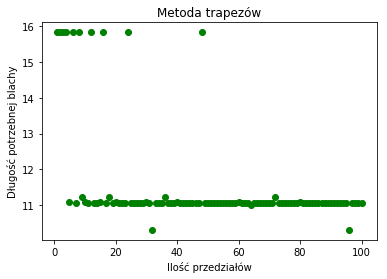

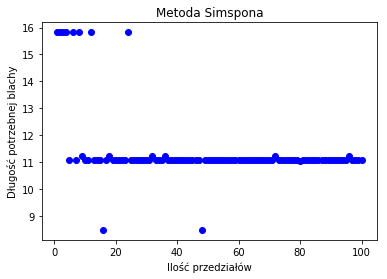

In [36]:
gamma = lambda t : 0.1 * math.sin(10 * math.pi * t)
dgamma = lambda t : math.pi * math.cos(10 * math.pi * t)


f = lambda t : math.sqrt(1 + (dgamma(t))**2)

blachaTrapezy = lambda i : complexTrapezoidalRule(f, 0, 4.8, i) 
blachaSimpson = lambda i : complexSimpsonRule(f, 0, 4.8, i)
blachaRomberg = romberg(f, 0, 4.8)


print("Długość blachy trapezy: ", blachaTrapezy(10))
print("Długość blachy simpson: ", blachaSimpson(10))
print("Długość blachy romberg: ", blachaRomberg)

for i in range(1, 101):
    plt.plot(i, blachaTrapezy(i), 'go')

plt.title("Metoda trapezów")
plt.xlabel("Ilość przedziałów")
plt.ylabel("Długość potrzebnej blachy")
plt.show()


for i in range(1, 101):
    plt.plot(i, blachaSimpson(i), 'bo')

plt.title("Metoda Simspona")
plt.xlabel("Ilość przedziałów")
plt.ylabel("Długość potrzebnej blachy")
plt.show()
